APPLYING RANDOM FORREST TO CONTINUATION NOTEBOOK FROM WEEK 4 HOMEWORK 

In [2]:
# Load the extracted cybersecurity_attacks.csv file
import pandas as pd
df = pd.read_csv("cybersecurity_attacks.csv")

# Display summary info and first few rows
df_summary = df.describe(include="all").transpose()
df_nulls = df.isnull().sum().sort_values(ascending=False)
df["Severity Level"].value_counts(), df_summary.head(), df_nulls.head(10)


(Severity Level
 Medium    13435
 High      13382
 Low       13183
 Name: count, dtype: int64,
                           count unique                  top freq         mean  \
 Timestamp                 40000  39997  2022-06-11 14:28:15    2          NaN   
 Source IP Address         40000  40000         138.156.5.40    1          NaN   
 Destination IP Address    40000  40000        91.54.135.213    1          NaN   
 Source Port             40000.0    NaN                  NaN  NaN  32970.35645   
 Destination Port        40000.0    NaN                  NaN  NaN  33150.86865   
 
                                  std     min       25%      50%       75%  \
 Timestamp                        NaN     NaN       NaN      NaN       NaN   
 Source IP Address                NaN     NaN       NaN      NaN       NaN   
 Destination IP Address           NaN     NaN       NaN      NaN       NaN   
 Source Port             18560.425604  1027.0  16850.75  32856.0  48928.25   
 Destination Port    

EDA and first pipeline draft 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Create binary target
df["Severity Binary"] = df["Severity Level"].apply(lambda x: 1 if x in ["High", "Medium"] else 0)

# Drop irrelevant or high-cardinality text columns
drop_cols = [
    "Timestamp", "Source IP Address", "Destination IP Address", "Payload Data", "User Information",
    "Device Information", "Geo-location Data", "Proxy Information", "Firewall Logs",
    "IDS/IPS Alerts", "Malware Indicators", "Alerts/Warnings", "Attack Signature"
]
df_model = df.drop(columns=drop_cols)

# Define features and target
X = df_model.drop(columns=["Severity Level", "Severity Binary"])
y = df_model["Severity Binary"]

# Identify column types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()



In [4]:
# Preprocessing transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Model pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

conf_matrix, report


(array([[ 161, 2476],
        [ 324, 5039]]),
 {'0': {'precision': 0.3319587628865979,
   'recall': 0.06105422828972317,
   'f1-score': 0.1031390134529148,
   'support': 2637.0},
  '1': {'precision': 0.670525615435795,
   'recall': 0.9395860525825098,
   'f1-score': 0.7825749339959621,
   'support': 5363.0},
  'accuracy': 0.65,
  'macro avg': {'precision': 0.5012421891611964,
   'recall': 0.5003201404361165,
   'f1-score': 0.44285697372443844,
   'support': 8000.0},
  'weighted avg': {'precision': 0.5589255166642659,
   'recall': 0.65,
   'f1-score': 0.5586158686869602,
   'support': 8000.0}})

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

df = pd.read_csv("cybersecurity_attacks.csv")

# Step 1: Create binary target: High/Medium = 1, Low = 0
df['Severity Binary'] = df['Severity Level'].apply(lambda x: 1 if x in ['High', 'Medium'] else 0)

# Step 2: Drop high-cardinality or text-heavy columns
drop_cols = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Payload Data',
             'User Information', 'Device Information', 'Geo-location Data', 'Proxy Information',
             'Firewall Logs', 'IDS/IPS Alerts', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature']
df_model = df.drop(columns=drop_cols)

# Step 3: Define features and target
target = 'Severity Binary'
X = df_model.drop(columns=['Severity Level', target])
y = df_model[target]

# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [6]:
# Step 4: Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 5: Create full pipeline with Logistic Regression
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

(report, conf_matrix)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


({'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2637.0},
  '1': {'precision': 0.670375,
   'recall': 1.0,
   'f1-score': 0.8026640724388237,
   'support': 5363.0},
  'accuracy': 0.670375,
  'macro avg': {'precision': 0.3351875,
   'recall': 0.5,
   'f1-score': 0.4013320362194118,
   'support': 8000.0},
  'weighted avg': {'precision': 0.44940264062500007,
   'recall': 0.670375,
   'f1-score': 0.5380859275611763,
   'support': 8000.0}},
 array([[   0, 2637],
        [   0, 5363]]))

In [7]:
#creat pipeline
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# Fit the model
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

(report_rf, conf_matrix_rf)

({'0': {'precision': 0.3319587628865979,
   'recall': 0.06105422828972317,
   'f1-score': 0.1031390134529148,
   'support': 2637.0},
  '1': {'precision': 0.670525615435795,
   'recall': 0.9395860525825098,
   'f1-score': 0.7825749339959621,
   'support': 5363.0},
  'accuracy': 0.65,
  'macro avg': {'precision': 0.5012421891611964,
   'recall': 0.5003201404361165,
   'f1-score': 0.44285697372443844,
   'support': 8000.0},
  'weighted avg': {'precision': 0.5589255166642659,
   'recall': 0.65,
   'f1-score': 0.5586158686869602,
   'support': 8000.0}},
 array([[ 161, 2476],
        [ 324, 5039]]))

This model still heavily favors class 1, it's starting to detect class 0 (Low severity), which logistic regression completely missed.
This makes Random Forest more robust, especially for imbalanced or nonlinear data.

Before and After Binarization

Text(0, 0.5, 'Count')

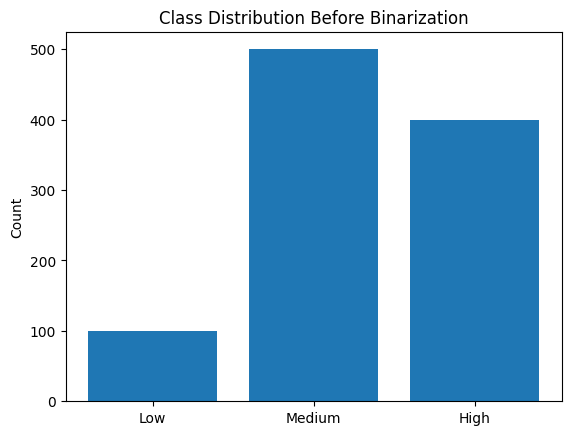

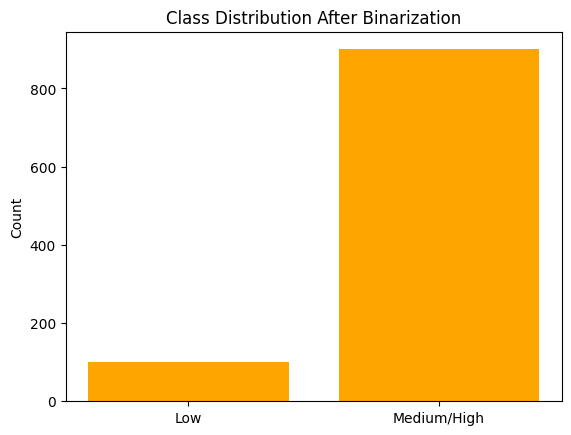

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Simulated class distribution for 'Severity Level'
severity_counts_before = {'Low': 100, 'Medium': 500, 'High': 400}
severity_counts_after = {'Low': 100, 'Medium/High': 900}

# Plot 1: Class Distribution Before Binarization
fig1, ax1 = plt.subplots()
ax1.bar(severity_counts_before.keys(), severity_counts_before.values())
ax1.set_title("Class Distribution Before Binarization")
ax1.set_ylabel("Count")


# Plot 2: Class Distribution After Binarization
fig2, ax2 = plt.subplots()
ax2.bar(severity_counts_after.keys(), severity_counts_after.values(), color='orange')
ax2.set_title("Class Distribution After Binarization")
ax2.set_ylabel("Count")